# COGS 108 - EDA Checkpoint

# Names

- Scott Andrews
- Steven Youssef
- Connor Moore
- Sung Cho
- Edgar Diaz

<a id='research_question'></a>
# Research Question

*How has the negativity and divisiveness of news articles affected the trend of hate crimes in America from 2010-2020?*

# Setup

In [1]:
## YOUR CODE HERE
## YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
r = requests.get("http://api.mediastack.com/v1/news?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100&sources=cnn,bbc,foxnews,aljazeera,nytimes,time")
responses = r.json()
 
# Define the collected API responses
mediastackData = responses['data']
 
# Normalize or unnest the JSON response
flatData = pd.json_normalize(mediastackData)
 
# Create data frame, and save them to CSV
dfs = pd.DataFrame(flatData)

Bias_2010 = pd.read_csv('HC_Bias_2010.csv')
Bias_2011 = pd.read_csv('HC_Bias_2011.csv')
Bias_2012 = pd.read_csv('HC_Bias_2012.csv')
Bias_2013 = pd.read_csv('HC_Bias_2013.csv')
Bias_2014 = pd.read_csv('HC_Bias_2014.csv')
Bias_2015 = pd.read_csv('HC_Bias_2015.csv')
Bias_2016 = pd.read_csv('HC_Bias_2016.csv')
Bias_2017 = pd.read_csv('HC_Bias_2017.csv')
Bias_2018 = pd.read_csv('HC_Bias_2018.csv')
Bias_2019 = pd.read_csv('HC_Bias_2019.csv')
Bias_2020 = pd.read_csv('HC_Bias_2020.csv')
IC_2010 = pd.read_csv('Incident-Count-by-Quarter_2010.csv')
IC_2011 = pd.read_csv('Incident-Count-by-Quarter_2011.csv')
IC_2012 = pd.read_csv('Incident-Count-by-Quarter_2012.csv')
IC_2013 = pd.read_csv('Incident-Count-by-Quarter_2013.csv')
IC_2014 = pd.read_csv('Incident-Count-by-Quarter_2014.csv')
IC_2015 = pd.read_csv('Incident-Count-by-Quarter_2015.csv')
IC_2016 = pd.read_csv('Incident-Count-by-Quarter_2016.csv')
IC_2017 = pd.read_csv('Incident-Count-by-Quarter_2017.csv')
IC_2018 = pd.read_csv('Incident-Count-by-Quarter_2018.csv')
IC_2019 = pd.read_csv('Incident-Count-by-Quarter_2019.csv')
IC_2020 = pd.read_csv('Incident-Count-by-Quarter_2020.csv')


# Data Cleaning

Describe your data cleaning steps here.

In [136]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
# Change Columns from "key" and "value" to "HC Type" and "Count"
Bias_2010.columns = ["hc_type","count"]
Bias_2011.columns = ["hc_type","count"]
Bias_2012.columns = ["hc_type","count"]
Bias_2013.columns = ["hc_type","count"]
Bias_2014.columns = ["hc_type","count"]
Bias_2015.columns = ["hc_type","count"]
Bias_2016.columns = ["hc_type","count"]
Bias_2017.columns = ["hc_type","count"]
Bias_2018.columns = ["hc_type","count"]
Bias_2019.columns = ["hc_type","count"]
Bias_2020.columns = ["hc_type","count"]
IC_2010.columns = ["quarter","count"]
IC_2011.columns = ["quarter","count"]
IC_2012.columns = ["quarter","count"]
IC_2013.columns = ["quarter","count"]
IC_2014.columns = ["quarter","count"]
IC_2015.columns = ["quarter","count"]
IC_2016.columns = ["quarter","count"]
IC_2017.columns = ["quarter","count"]
IC_2018.columns = ["quarter","count"]
IC_2019.columns = ["quarter","count"]
IC_2020.columns = ["quarter","count"] 

#Function for resetting index for IC data 
# Files were sorted by highest count originally, adjusted to be sorted by quarter #.
def sort_ic_index(df_input):
    df_input = df_input.sort_values("quarter")
    df_input = df_input.reset_index(drop=True)
    return df_input

IC_2010 = sort_ic_index(IC_2010)
IC_2011 = sort_ic_index(IC_2011)
IC_2012 = sort_ic_index(IC_2012)
IC_2013 = sort_ic_index(IC_2013)
IC_2014 = sort_ic_index(IC_2014)
IC_2015 = sort_ic_index(IC_2015)
IC_2016 = sort_ic_index(IC_2016)
IC_2017 = sort_ic_index(IC_2017)
IC_2018 = sort_ic_index(IC_2018)
IC_2019 = sort_ic_index(IC_2019)
IC_2020 = sort_ic_index(IC_2020)

years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
quarters = ['2010_1','2010_2','2010_3','2010_4',
            '2011_1','2011_2','2011_3','2011_4',
            '2012_1','2012_2','2012_3','2012_4',
            '2013_1','2013_2','2013_3','2013_4',
            '2014_1','2014_2','2014_3','2014_4',
            '2015_1','2015_2','2015_3','2015_4',
            '2016_1','2016_2','2016_3','2016_4',
            '2017_1','2017_2','2017_3','2017_4',
            '2018_1','2018_2','2018_3','2018_4',
            '2019_1','2019_2','2019_3','2019_4',
            '2020_1','2020_2','2020_3','2020_4']

# Get the count of the amount of hate crimes of the specified type, for each year
def getHCCount(str_in):
    tempList = []
    tempList.append(Bias_2010[Bias_2010.hc_type.isin([str_in])]['count'][Bias_2010[Bias_2010.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2011[Bias_2011.hc_type.isin([str_in])]['count'][Bias_2011[Bias_2012.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2012[Bias_2012.hc_type.isin([str_in])]['count'][Bias_2012[Bias_2012.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2013[Bias_2013.hc_type.isin([str_in])]['count'][Bias_2013[Bias_2013.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2014[Bias_2014.hc_type.isin([str_in])]['count'][Bias_2014[Bias_2014.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2015[Bias_2015.hc_type.isin([str_in])]['count'][Bias_2015[Bias_2015.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2016[Bias_2016.hc_type.isin([str_in])]['count'][Bias_2016[Bias_2016.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2017[Bias_2017.hc_type.isin([str_in])]['count'][Bias_2017[Bias_2017.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2018[Bias_2018.hc_type.isin([str_in])]['count'][Bias_2018[Bias_2018.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2019[Bias_2019.hc_type.isin([str_in])]['count'][Bias_2019[Bias_2019.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2020[Bias_2020.hc_type.isin([str_in])]['count'][Bias_2020[Bias_2020.hc_type.isin([str_in])]['count'].index[0]])


    return tempList

# Create Dataframes containing the info about the top 5 most common hate crimes and their count per year.
BiasABList = getHCCount('Anti-Black or African American')
BiasAB = pd.DataFrame()
BiasAB['count'] = BiasABList
BiasAB['year'] = years
BiasAWList = getHCCount('Anti-White')
BiasAW = pd.DataFrame()
BiasAW['count'] = BiasAWList
BiasAW['year'] = years
BiasAJList = getHCCount('Anti-Jewish')
BiasAJ = pd.DataFrame()
BiasAJ['count'] = BiasAJList
BiasAJ['year'] = years
BiasAGList = getHCCount('Anti-Gay (Male)')
BiasAG = pd.DataFrame()
BiasAG['count'] = BiasAGList
BiasAG['year'] = years
BiasAHList = getHCCount('Anti-Hispanic or Latino')
BiasAH = pd.DataFrame()
BiasAH['count'] = BiasAHList
BiasAH['year'] = years

ICBigDF = pd.DataFrame()
ICBigDF['count'] = [IC_2010.iat[0,1],IC_2010.iat[1,1],IC_2010.iat[2,1],IC_2010.iat[3,1],
                    IC_2011.iat[0,1],IC_2011.iat[1,1],IC_2011.iat[2,1],IC_2011.iat[3,1],
                    IC_2012.iat[0,1],IC_2012.iat[1,1],IC_2012.iat[2,1],IC_2012.iat[3,1],
                    IC_2013.iat[0,1],IC_2013.iat[1,1],IC_2013.iat[2,1],IC_2013.iat[3,1],
                    IC_2014.iat[0,1],IC_2014.iat[1,1],IC_2014.iat[2,1],IC_2014.iat[3,1],
                    IC_2015.iat[0,1],IC_2015.iat[1,1],IC_2015.iat[2,1],IC_2015.iat[3,1],
                    IC_2016.iat[0,1],IC_2016.iat[1,1],IC_2016.iat[2,1],IC_2016.iat[3,1],
                    IC_2017.iat[0,1],IC_2017.iat[1,1],IC_2017.iat[2,1],IC_2017.iat[3,1],
                    IC_2018.iat[0,1],IC_2018.iat[1,1],IC_2018.iat[2,1],IC_2018.iat[3,1],
                    IC_2019.iat[0,1],IC_2019.iat[1,1],IC_2019.iat[2,1],IC_2019.iat[3,1],
                    IC_2020.iat[0,1],IC_2020.iat[1,1],IC_2020.iat[2,1],IC_2020.iat[3,1]]
ICBigDF['quarters'] = quarters

#Cleaning Article information
News = pd.DataFrame()
News['Title'] = dfs['title']  
News['Description'] = dfs['description']
News['Year'] = dfs['published_at']
News.head()

,Title,Description,Year
0,At least three killed in suspected terror atta...,At least three people were killed and four inj...,2022-05-05T19:35:11+00:00
1,Israel’s PM says Putin has apologised for Lavr...,Bennett thanked Putin for clarifying his attit...,2022-05-05T19:30:35+00:00
2,"Two killed, many injured in Tel Aviv shooting",Two people were killed and more than a dozen o...,2022-05-05T22:55:11+00:00
3,Law enforcement officials warn of potential vi...,"Law enforcement officials in Washington, DC, a...",2022-05-06T03:09:30+00:00
4,Golf on safari: animals roam the greens at Afr...,"At Africa's only PGA accredited golf course, z...",2022-05-06T08:37:57+00:00


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Hate Crime Count')]

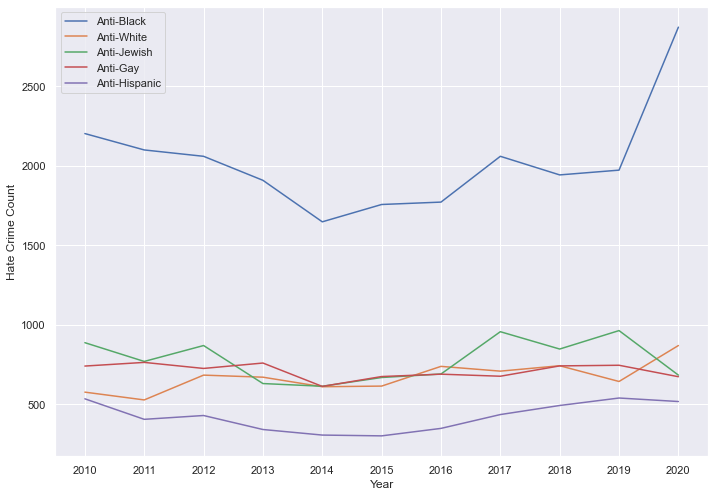

In [123]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
sns.set(rc={'figure.figsize':(11.7,8.27)})
B1 = sns.lineplot(x='year',y='count',data=BiasAB,label='Anti-Black')
B2 = sns.lineplot(x='year',y='count',data=BiasAW,label='Anti-White')
B3 = sns.lineplot(x='year',y='count',data=BiasAJ,label='Anti-Jewish')
B4 = sns.lineplot(x='year',y='count',data=BiasAG,label='Anti-Gay')
B5 = sns.lineplot(x='year',y='count',data=BiasAH,label='Anti-Hispanic')
plt.legend()
B5.set(xlabel='Year', ylabel='Hate Crime Count')

This graph plots the top 5 most common groups that are targeted for hate crimes from the years 2010-2020. For all categories there is a noticeable downwards trend during 2013-2014, but then it picks back up and each one peaks around 2019-2020. Both Anti-Black and Anti-White increase from 2019-2020, which is around the advent of the election. Our initial impressions are that they all increase due to tensions from the 2020 election and that news articles released around this time could instigate more hate crimes.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

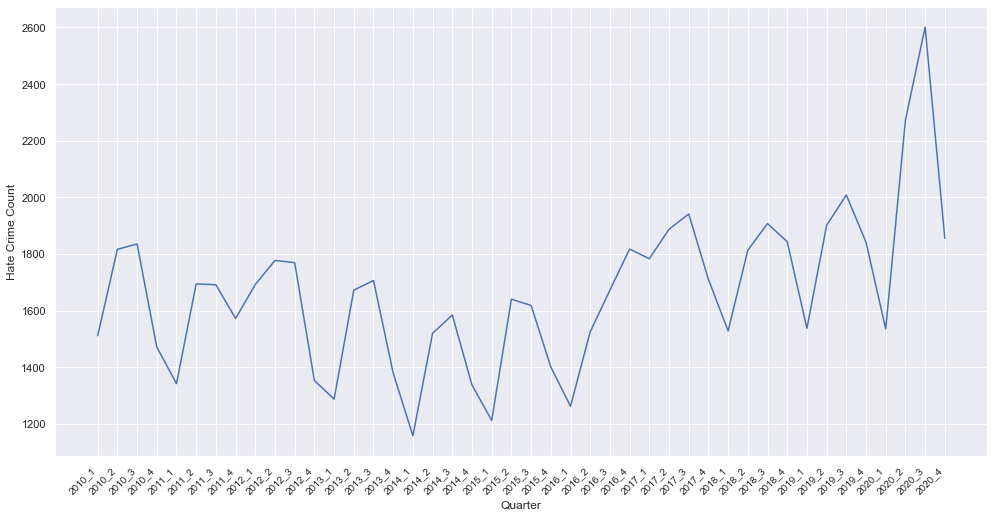

In [150]:
sns.set(rc={'figure.figsize':(16.7,8.27)})
I1 = sns.lineplot(x='quarters',y='count',data=ICBigDF)
I1.set(xlabel='Quarter', ylabel='Hate Crime Count')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

After grouping up all of the Incident Counts by Quarter for the years 2010-2020 we have found that although the counts tend to spike up and down where the beginning of each year seems to be the low points. From 2010-2015 there was a downwards trend on the total amount of hate crimes per quarter, but 2015 onwards it has only increased. 2016 Quarter 2 and later has a massive spike in hate crimes that hits an all time high in 2020. Our initial impressions are that these would be due to the 2016 and 2020 elections, and as mentioned above, how the news reports on thing and the words they use may have a big impact on these rates.

In [14]:

titles = News['Title']
analyzer = SentimentIntensityAnalyzer()
# scores list for sentiment 
scores = []
for title in titles:
    vs = analyzer.polarity_scores(title)
    # append analysis to 
    scores.append(vs)
    print("{:-<65} {}".format(title, str(vs)))

# Create data frame of sentiment analysis
sentiment_data = pd.DataFrame(scores)
# Concatenate the two data frames so titles and sentiment data align correctly in the new Dataframe
title_sentiment = pd.concat([titles,sentiment_data], axis=1)

At least three killed in suspected terror attack in Israel------- {'neg': 0.683, 'neu': 0.317, 'pos': 0.0, 'compound': -0.9169}
Israel’s PM says Putin has apologised for Lavrov’s Hitler remarks {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.1027}
Two killed, many injured in Tel Aviv shooting-------------------- {'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.802}
Law enforcement officials warn of potential violence in DC and nationwide in wake of Supreme Court draft opinion {'neg': 0.228, 'neu': 0.622, 'pos': 0.149, 'compound': -0.2263}
Golf on safari: animals roam the greens at Africa's only PGA-accredited course {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Asian Games in China postponed over COVID-19 resurgence---------- {'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'compound': -0.2023}
Election results 2022: Labour win inaugural Cumberland vote------ {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.5859}
Vicky White was once a trusted corrections officer, b

In [18]:
# Added data frame with Title and corresponding sentiment analysis data
title_sentiment.head()



,Title,neg,neu,pos,compound
0,At least three killed in suspected terror atta...,0.683,0.317,0.000,-0.9169
1,Israel’s PM says Putin has apologised for Lavr...,0.000,0.865,0.135,0.1027
2,"Two killed, many injured in Tel Aviv shooting",0.545,0.455,0.000,-0.8020
3,Law enforcement officials warn of potential vi...,0.228,0.622,0.149,-0.2263
4,Golf on safari: animals roam the greens at Afr...,0.000,1.000,0.000,0.0000
